In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#CSVs Selection process
#inspection of all files to understand
df_categories=pd.read_csv("./data/raw/categories.csv",    on_bad_lines="skip",engine="python")
df_customers=pd.read_csv("./data/raw/customers.csv",    on_bad_lines="skip",engine="python")
df_employee_territories=pd.read_csv("./data/raw/employee-territories.csv",    on_bad_lines="skip",engine="python")
df_employees=pd.read_csv("./data/raw/employees.csv",    on_bad_lines="skip",engine="python")
df_order_details=pd.read_csv("./data/raw/order-details.csv",    on_bad_lines="skip",engine="python")
df_orders=pd.read_csv("./data/raw/orders.csv",    on_bad_lines="skip",engine="python")
df_products=pd.read_csv("./data/raw/products.csv",    on_bad_lines="skip",engine="python")
df_regions=pd.read_csv("./data/raw/regions.csv",    on_bad_lines="skip",engine="python")
df_shippers=pd.read_csv("./data/raw/shippers.csv",    on_bad_lines="skip",engine="python")
df_suppliers=pd.read_csv("./data/raw/suppliers.csv",    on_bad_lines="skip",engine="python")
df_territories=pd.read_csv("./data/raw/territories.csv",    on_bad_lines="skip",engine="python")
#Check all columns names
print(f"categories  :   {df_categories.columns}")
print(f"customers  :   {df_customers.columns}")
print(f"employee-territories  :   {df_employee_territories.columns}")
print(f"Employees  :   {df_employees.columns}")
print(f" order-details :   {df_order_details.columns}")
print(f"orders :   {df_orders.columns}")
print(f"products  :   {df_products.columns}")
print(f"regions :   {df_regions.columns}")
print(f" shippers :   {df_shippers.columns}")
print(f" suppliers :   {df_suppliers.columns}")
print(f"territories  :   {df_territories.columns}")
#For Sales insights we only need Categories,Orders,order_details,Products,customers


categories  :   Index(['categoryID', 'categoryName', 'description', 'picture'], dtype='object')
customers  :   Index(['customerID', 'companyName', 'contactName', 'contactTitle', 'address',
       'city', 'region', 'postalCode', 'country', 'phone', 'fax'],
      dtype='object')
employee-territories  :   Index(['employeeID', 'territoryID'], dtype='object')
Employees  :   Index(['employeeID', 'lastName', 'firstName', 'title', 'titleOfCourtesy',
       'birthDate', 'hireDate', 'address', 'city', 'region', 'postalCode',
       'country', 'homePhone', 'extension', 'photo', 'notes', 'reportsTo',
       'photoPath'],
      dtype='object')
 order-details :   Index(['orderID', 'productID', 'unitPrice', 'quantity', 'discount'], dtype='object')
orders :   Index(['orderID', 'customerID', 'employeeID', 'orderDate', 'requiredDate',
       'shippedDate', 'shipVia', 'freight', 'shipName', 'shipAddress',
       'shipCity', 'shipRegion', 'shipPostalCode', 'shipCountry'],
      dtype='object')
products  :

In [188]:
#Dropping Unnecessary Columns
df_categories.info()
df_orders.info()
df_order_details.info()
df_products.info()
df_customers.drop([ 'companyName', 'contactName', 'contactTitle', 'address','region', 'postalCode', 'phone', 'fax'],axis=1,inplace=True)
df_categories.drop(['description','picture'],axis=1,inplace=True)
df_orders.drop([ 'employeeID', 'requiredDate',
       'shippedDate', 'shipVia', 'freight', 'shipName',"shipRegion" ,'shipAddress',
       'shipCity','shipPostalCode', 'shipCountry'],axis=1,inplace=True)
df_products.drop( ['supplierID', 'unitsInStock', 'unitsOnOrder', 'reorderLevel', 'discontinued'],axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   categoryID    8 non-null      int64 
 1   categoryName  8 non-null      object
 2   description   8 non-null      object
 3   picture       8 non-null      object
dtypes: int64(1), object(3)
memory usage: 388.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   orderID         654 non-null    int64  
 1   customerID      654 non-null    object 
 2   employeeID      654 non-null    int64  
 3   orderDate       654 non-null    object 
 4   requiredDate    654 non-null    object 
 5   shippedDate     636 non-null    object 
 6   shipVia         654 non-null    int64  
 7   freight         654 non-null    float64
 8   shipName        654 non-null    o

In [189]:
df_categories.info()
df_orders.info()
df_order_details.info()
df_products.info()
df_territories.info()
df_regions.info()

df_territories.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   categoryID    8 non-null      int64 
 1   categoryName  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   orderID     654 non-null    int64 
 1   customerID  654 non-null    object
 2   orderDate   654 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   orderID    2155 non-null   int64  
 1   productID  2155 non-null   int64  
 2   unitPrice  2155 non-null   float64
 3   quantity   

,territoryID,territoryDescription,regionID
0,1581,Westboro,1
1,1730,Bedford,1
2,1833,Georgetow,1
3,2116,Boston,1
4,2139,Cambridge,1
5,2184,Braintree,1
6,2903,Providence,1
7,3049,Hollis,3
8,3801,Portsmouth,3
9,6897,Wilton,1


In [190]:
#merging dataset

'''
relationships
   Product ---> CategoryID
   |
Orderdetail->orders ---->customers
'''


sales_analysis=pd.merge(df_products,df_categories,on="categoryID",how="inner")
sales_analysis.head()
sales_analysis=pd.merge(sales_analysis,df_order_details,on="productID",how="left",suffixes=('_original','_ordertime'))
sales_analysis.head(10)
#display(sales_analysis.tail(10))
sales_analysis=pd.merge(sales_analysis,df_orders,on="orderID",how="left")
sales_analysis.tail(10)
df_regions.head()
sales_analysis.tail()
sales_analysis=pd.merge(sales_analysis,df_customers,on="customerID",how="left")
sales_analysis.tail()

,productID,productName,categoryID,quantityPerUnit,unitPrice_original,categoryName,orderID,unitPrice_ordertime,quantity,discount,customerID,orderDate,city,country
2150,77,Original Frankfurter grüne Soße,2,12 boxes,13.0,Condiments,11000,13.0,30,0.00,RATTC,1998-04-06 00:00:00.000,Albuquerque,USA
2151,77,Original Frankfurter grüne Soße,2,12 boxes,13.0,Condiments,11015,13.0,18,0.00,SANTG,1998-04-10 00:00:00.000,Stavern,Norway
2152,77,Original Frankfurter grüne Soße,2,12 boxes,13.0,Condiments,11060,13.0,10,0.00,FRANS,1998-04-30 00:00:00.000,Torino,Italy
2153,77,Original Frankfurter grüne Soße,2,12 boxes,13.0,Condiments,11068,13.0,28,0.15,NaN,NaN,NaN,NaN
2154,77,Original Frankfurter grüne Soße,2,12 boxes,13.0,Condiments,11077,13.0,2,0.00,RATTC,1998-05-06 00:00:00.000,Albuquerque,USA


In [191]:
index_number=sales_analysis.select_dtypes(include="number").columns
index_string=sales_analysis.select_dtypes(include="object").columns
sales_analysis[index_number]=sales_analysis[index_number].fillna(0)
sales_analysis[index_string]=sales_analysis[index_string].fillna("missing")
sales_analysis.tail()

,productID,productName,categoryID,quantityPerUnit,unitPrice_original,categoryName,orderID,unitPrice_ordertime,quantity,discount,customerID,orderDate,city,country
2150,77,Original Frankfurter grüne Soße,2,12 boxes,13.0,Condiments,11000,13.0,30,0.00,RATTC,1998-04-06 00:00:00.000,Albuquerque,USA
2151,77,Original Frankfurter grüne Soße,2,12 boxes,13.0,Condiments,11015,13.0,18,0.00,SANTG,1998-04-10 00:00:00.000,Stavern,Norway
2152,77,Original Frankfurter grüne Soße,2,12 boxes,13.0,Condiments,11060,13.0,10,0.00,FRANS,1998-04-30 00:00:00.000,Torino,Italy
2153,77,Original Frankfurter grüne Soße,2,12 boxes,13.0,Condiments,11068,13.0,28,0.15,missing,missing,missing,missing
2154,77,Original Frankfurter grüne Soße,2,12 boxes,13.0,Condiments,11077,13.0,2,0.00,RATTC,1998-05-06 00:00:00.000,Albuquerque,USA


In [192]:
#cleaned Sales_analysis CSv
sales_analysis.to_csv("Sales_analysis_by_product.csv",index=False)

In [193]:
sales_analysis.columns

Index(['productID', 'productName', 'categoryID', 'quantityPerUnit',
       'unitPrice_original', 'categoryName', 'orderID', 'unitPrice_ordertime',
       'quantity', 'discount', 'customerID', 'orderDate', 'city', 'country'],
      dtype='object')

In [194]:
sales_analysis["revenue"]=sales_analysis['unitPrice_ordertime']*sales_analysis['quantity']
#Revenue by product
revenue_by_product=sales_analysis.groupby(by="productName")["revenue"].sum()
minimum_revenue=revenue_by_product.idxmin()
maximum_revenue=revenue_by_product.idxmax()
min_revenue=revenue_by_product.min()
max_revenue=revenue_by_product.max()
print(f" Product : minimum revenue : {min_revenue} of {minimum_revenue} , maximum revenue {max_revenue} of  :{maximum_revenue}")
#How much Products got the minimum revenue
min_revenue_count=np.where(revenue_by_product==revenue_by_product.min(),True,False).sum()
print(f" Minimum Revenue counts :{min_revenue_count}") 
#How much Products got the maximum revenue
max_revenue_count=np.where(revenue_by_product==revenue_by_product.max(),True,False).sum()
print(f" Maximum Revenue counts :{max_revenue_count}") 


 Product : minimum revenue : 1542.75 of Chocolade , maximum revenue 149984.2 of  :Côte de Blaye
 Minimum Revenue counts :1
 Maximum Revenue counts :1


In [195]:
#HOW MUCH SALES WE GOT FROM EACH CUSTOMERS\
sales_from_customer=sales_analysis.groupby(by="customerID")["orderID"].count()
sales_from_customer.drop("missing",axis=0,inplace=True)
print(f" we have total sales {sales_from_customer.sum()} the maximum sales we had from the customer  :{sales_from_customer.idxmax()}  of {sales_from_customer.max()} the minimum sales we had from the customer  : {sales_from_customer.idxmin()}  of {sales_from_customer.min()}" )

 we have total sales 1716 the maximum sales we had from the customer  :SAVEA  of 116 the minimum sales we had from the customer  : CENTC  of 2


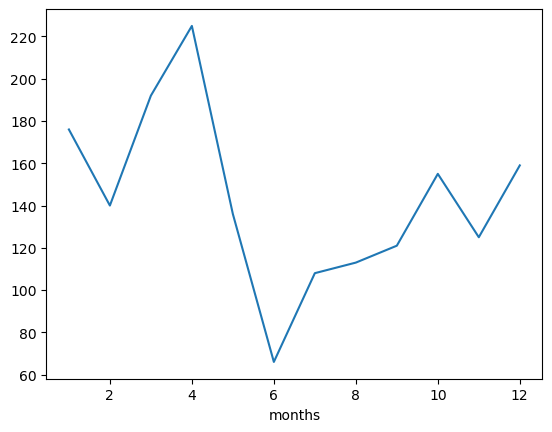

In [196]:
#plot
df=pd.DataFrame()
df["date"]=(sales_analysis["orderDate"].replace("missing",np.nan)).dropna()
df["orderID"]=(sales_analysis["orderID"].replace(0,np.nan)).dropna()
df["date"]=pd.to_datetime(df["date"])
df["months"]=df["date"].dt.month
SalesBymonths=df.groupby(by="months")["orderID"].count()

SalesBymonths.plot(x="months")
plt.savefig("./images/month_sales.png")
plt.show()